In [9]:
import requests
import re
from bs4 import BeautifulSoup
from multiprocessing import  Process
import os
import time

In [10]:
category = ['bangumi', 'guochan', 'guochuang', 'documentary', 'douga', 'music', 'dance', 'game', 'technology', 'digital', 'life', 'food', 'animal', 'kichiku', 'fashion', 'ent', 'cinephile', 'movie', 'tv', 'origin', 'rookie']
base_url = 'https://www.bilibili.com/v/popular/rank/'

In [11]:
url = base_url + category[6]
head = {}
head['User-Agent'] = 'Mozilla/5.0 (Linux; Android 4.0.4; Galaxy Nexus Build/IMM76B) AppleWebKit/535.19 (KHTML, like Gecko) Chrome/18.0.1025.133 Mobile Safari/535.19'

In [12]:
req = requests.get(url,headers=head)
req.encoding = 'utf-8'
html = req.text
bs = BeautifulSoup(html,'lxml')

In [13]:
numList = [1,2,3,1,2,4]
for i in numList:
    if numList.count(i) > 1:
        numList.remove(i)
print(numList)

[3, 1, 2, 4]


In [14]:
detail = bs.find_all(class_ = 'detail')
play_class, view_class, author_class = 'b-icon play', 'b-icon view', 'b-icon author'
de = re.compile('\s{1,}([^\s]{1,})\\n')
a, b, c= de.findall(detail[0].text)
a

'126.7万'

In [15]:
item = bs.find_all(href = re.compile('<*[AB]V\w{9,10}'), class_='title')
re_detail = re.compile('\s{1,}([^\s]{1,})\\n')
detail = bs.find_all(class_ = 'detail')
for i, (video, info) in enumerate(zip(item, detail)):
    play, chat, author = de.findall(info.text)
    print(i+1, video['href'][2:], video.text, play, chat, author)

1 www.bilibili.com/video/BV1DU4y1W7tx 一人成团！K/DA《More》翻跳 126.7万 7557 机智的党妹
2 www.bilibili.com/video/BV1eZ4y1A79y 与 梦 盛 开 ！努力成为闪闪发光的人~【兔总裁】 42.9万 4115 兔总裁s
3 www.bilibili.com/video/BV1hy4y1J7at 盛唐体验卡！宫灯舞《水月洛神》·《芙蓉池》！·河南元宵带你感受十三朝古都·神都洛阳之美！ 27.2万 1682 河南共青团
4 www.bilibili.com/video/BV11b4y1X7k4 可以住进你的梦里吗~与梦盛开【西四】 25.2万 388 西四炸弹
5 www.bilibili.com/video/BV1sK4y1H7FZ 突破次元壁！居然在高铁站遇到《唐宫夜宴》的小姐姐？？ 33.4万 362 共青团中央
6 www.bilibili.com/video/BV1K54y1e74e 【优瑞可】Bubble Pop！冬日小性感～活力满满！ 17万 180 优瑞可kk
7 www.bilibili.com/video/BV1db4y1X7Jx 大兔兔要蹦出来了❤️公孙离惊鸿舞【青鸢】 16万 205 青鸢Cyan-
8 www.bilibili.com/video/BV16y4y1a7UZ 【猛男舞团】这曲中国风太上头了！ 19.5万 407 猛男舞团IconX
9 www.bilibili.com/video/BV1Xy4y1h7sc 【中国联通】甜妹来袭★抚摸抚摸/なでなで 20.7万 534 中国联通客服官方
10 www.bilibili.com/video/BV12v411Y7ta ♥纯欲双系||你DNA动了吧♥圈圈点点圈圈点点圈圈点点 10.9万 705 萌爱moi
11 www.bilibili.com/video/BV1VX4y1V7t7 第一次 初恋的味道 ｜ First Kiss !!【紫仙丹初合体】 8.5万 474 紫颜-小仙紫
12 www.bilibili.com/video/BV1rA411K76X 小姐姐超治愈笑颜！你是不是和我有心电感应？ 9.1万 290 晓丹小仙女儿
13 www.bilibili.com/video/BV1Fb4y1d7

In [28]:
head = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'cookie': 'finger=158939783; buvid3=A3149F96-41C1-BA6A-353B-00D72BDD8D6F73922infoc; CURRENT_FNVAL=80; bsource=search_baidu; _uuid=5A9AD8BA-82CE-580D-D617-C74454283F4F75138infoc; blackside_state=1; sid=966rw8ka; PVID=1; finger=158939783',
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.190 Safari/537.36'
}
BVurl = 'https://www.bilibili.com/video/BV1Er4y1A712'
BVreq = requests.get(BVurl,headers=head)
BVreq.encoding = 'utf-8'
BVhtml = BVreq.text
BVbs = BeautifulSoup(html,'lxml')

In [95]:
from IPython.display import Image as Image

113


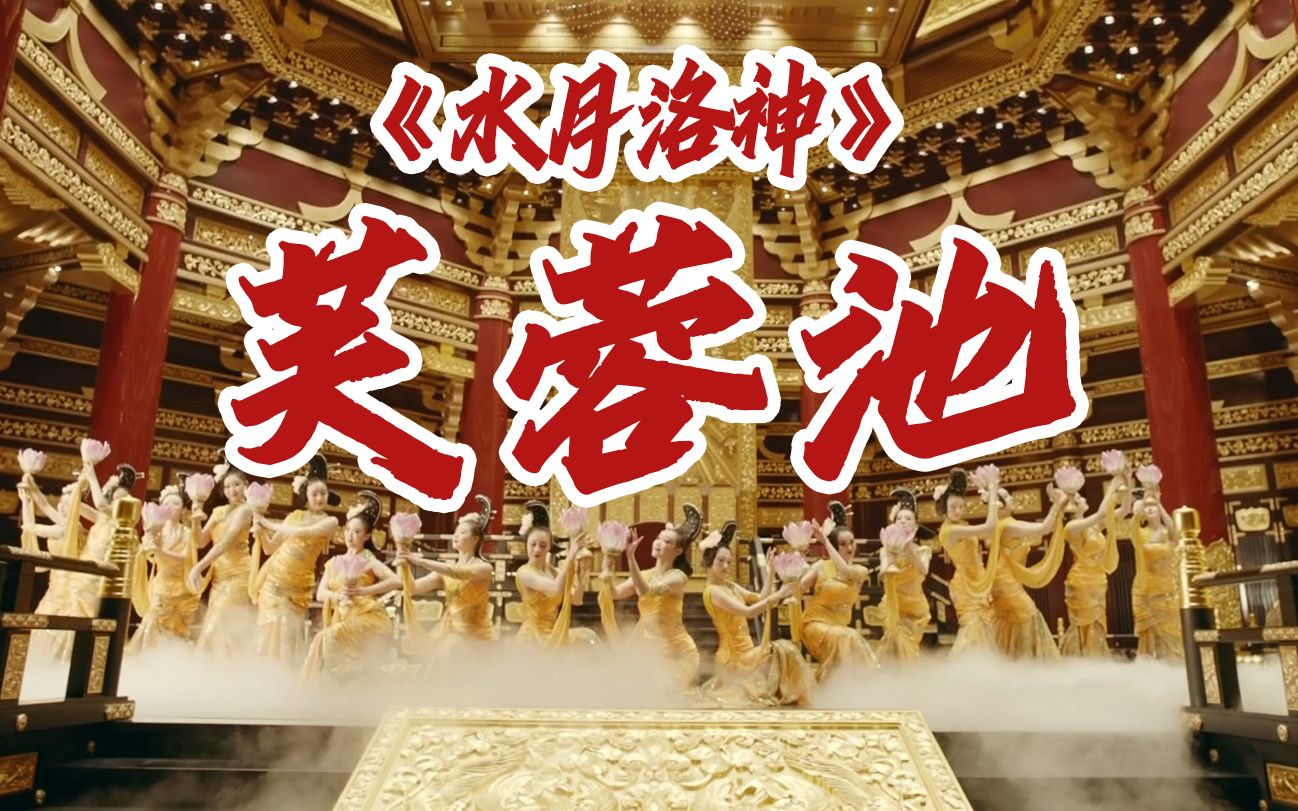

In [106]:
spr = bs.find_all('script')
findjpg = re.compile(r'"pic":"(http:\\u00[\w]F\\u00[\w]Fi[\w].hdslb.com\\u00[\w]Fbfs\\u00[\w]Farchive\\u00[\w]F\w{40}.jpg)')
tempjpg = findjpg.findall(spr[-6].text)
jpg_url = [re.sub(r'\\u00[\d]F','/',onejpg) for onejpg in tempjpg]
print(len(jpg_url))
#保存图片-测试
path = "D://abc.jpg"
jj_url = jpg_url[3]
r = requests.get(jj_url)
with open(path, "wb") as f:
    f.write(r.content)
f.close
display(Image(path))